In [31]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("multivariate_analysis.csv")

In [5]:
x = dataset.drop(columns=['NIM', 'PSQI1', 'PSQI2', 'PSQI3', 'PSQI4', 'PSQI5', 'PSQI6', 'PSQI7',])
y = dataset.iloc[:, -1]

In [73]:
y_class = []
for yi in list(y):
    if yi < 5:
        y_class.append(0)
    else:
        y_class.append(1)

print(y_class)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]


In [4]:
dataset = dataset.drop(columns=['NIM'])

In [7]:
# Standardize the features.
sc = StandardScaler()
x_std = sc.fit_transform(x)

In [8]:
cov_mat = np.cov(x_std.T)

In [9]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [10]:
len(eigen_vals)

4

In [11]:
# Calculate cumulative sum of explained variances.
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [12]:
print(len(var_exp))
print(len(cum_var_exp))

4
4


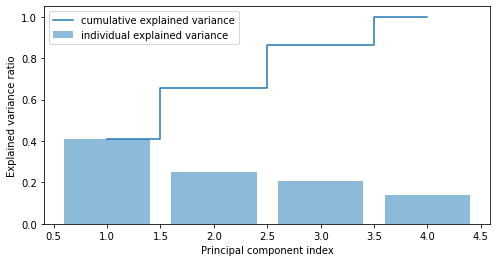

In [15]:
ax, fig = plt.subplots(1,1,figsize=(8, 4))
# Plot explained variances.
plt.bar(range(1,5), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1,5), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [80]:
# Make a list of (eigenvalue, eigenvector) tuples.
eigen_pairs = [(np.abs(eigen_vals[i]),
                eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low.
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis],))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.23689712 -0.8838216  -0.40320172]
 [-0.42076675 -0.46294796  0.77132466]
 [-0.62900525 -0.05737758 -0.26715503]
 [ 0.60925158 -0.03530415  0.41366028]]


In [53]:
l, c = zip(np.unique(y), colors, markers)

In [54]:
l

(0, 'r', 's')

In [72]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [70]:
for l in np.unique(y_class):
    print(X_train_pca[y_class==l, 1])

[]
[]


In [75]:
for l in np.unique(y_class):
    print(X_train_pca[y_class==l, 1])

[ 0.67618736 -1.63788514  0.52045534  0.87799476  1.43841251  0.45798046
  0.61079138  0.92736949  1.02649666 -0.15411919 -0.97281043  0.8129132
  0.88688719  0.58599008  0.48305872 -0.06012809  0.85747665 -0.02283221
  0.01917365  0.16828168 -1.22613388  1.60929688 -0.92424075 -0.38369626
 -1.70317982 -1.21258    -1.10241908 -1.6253009   1.0954457  -1.34239069
  0.93079542 -2.12275258 -1.18932864 -2.34575969  0.47468275  0.51118521
 -0.005554    0.22585617  0.18606654  0.9006922  -1.21323522  0.39967584
  0.27301411 -0.85310131  0.38792303  1.2214522  -0.9690437   0.61467048
  0.34069017 -0.89857111  0.48208908  1.07520455  0.88252908]
[-1.08431925  0.95099911  0.82641542  0.57564901  0.78036587  0.86713722
 -1.48666106 -1.05930427  0.81984052 -0.91741472  0.4321346   0.91827502
  0.29592523  1.07347894  0.78105855  0.90183805 -0.83697876  0.81478974
 -2.42157166  0.23172237 -1.36172549 -1.09733028]


In [ ]:
# Project training data onto PC1 and PC2.
X_train_pca = x_std.dot(w)

# Visualize projection.
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_class), colors, markers):
    print(l, c, m)
    X_train_pca[y==l, 0]
    plt.scatter3D(X_train_pca[y_class==l, 0], 
                X_train_pca[y_class==l, 1],
                X_train_pca[y_class==l, 2],
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()